In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
base_model = pd.read_csv('./1.loss_function/every_position_without_aux/validation_results.log')
pos_encoding_model = pd.read_csv('./3.positional_encoding/rotary/validation_results.log')
attention_model = pd.read_csv('./4.attention_mechanism/GQA/validation_results.log')
layer_6_model = pd.read_csv('./5.model_params/6.1.n_layers/n_layers_6/validation_results.log')
seq_len_256_model = pd.read_csv('./6.seq_len/seq_len_256/validation_results.log')

In [3]:
# define EMA function
def ema(data, alpha=0.4):
    ema_data = [data[0]]  # first value is same as series
    for price in data[1:]:
        ema_value = (price * alpha) + (ema_data[-1] * (1 - alpha))
        ema_data.append(ema_value)
    return ema_data

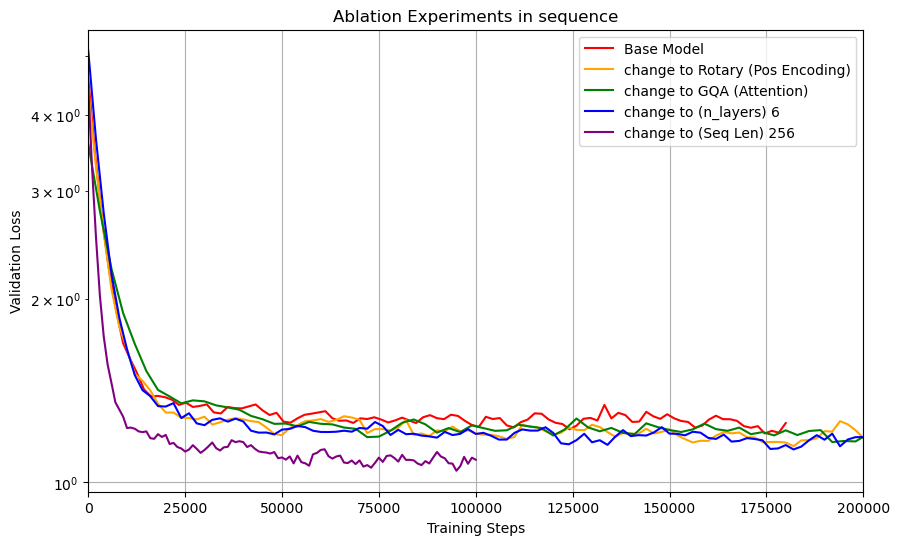

In [4]:
# Plotting validation loss comparison
plt.figure(figsize=(10, 6))
plt.plot(base_model['step'], ema(base_model[' val_loss']), label='Base Model', color='red')
plt.plot(pos_encoding_model['step'], ema(pos_encoding_model[' val_loss']), label='change to Rotary (Pos Encoding)', color='orange')
plt.plot(attention_model['step'], ema(attention_model[' val_loss']), label='change to GQA (Attention)', color='green')
plt.plot(layer_6_model['step'], ema(layer_6_model[' val_loss']), label='change to (n_layers) 6', color='blue')
plt.plot(seq_len_256_model['step'], ema(seq_len_256_model[' val_loss']), label='change to (Seq Len) 256', color='purple')
plt.xlabel('Training Steps')
plt.ylabel('Validation Loss')
plt.yscale('log')
plt.xlim(0, 200000)
plt.title('Ablation Experiments in sequence')
plt.legend()
plt.grid()
plt.savefig('ablations_experiment_comparison.jpg')
plt.show()